In [1]:
import findspark
findspark.init('C:\Spark\spark-2.4.7-bin-hadoop2.7')


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('AutomobileData').getOrCreate()
dataFields = spark.read.csv('C:\\Users\\Saravanacoumar\\Downloads\\BigDataCourseWork\\Automobile_data.csv',
                            header = True, inferSchema = True, nullValue='?',
                            ignoreLeadingWhiteSpace=True,
                            ignoreTrailingWhiteSpace=True)
dataFields.printSchema()

root
 |-- symboling: integer (nullable = true)
 |-- normalized-losses: integer (nullable = true)
 |-- make: string (nullable = true)
 |-- fuel-type: string (nullable = true)
 |-- aspiration: string (nullable = true)
 |-- num-of-doors: string (nullable = true)
 |-- body-style: string (nullable = true)
 |-- drive-wheels: string (nullable = true)
 |-- engine-location: string (nullable = true)
 |-- wheel-base: double (nullable = true)
 |-- length: double (nullable = true)
 |-- width: double (nullable = true)
 |-- height: double (nullable = true)
 |-- curb-weight: integer (nullable = true)
 |-- engine-type: string (nullable = true)
 |-- num-of-cylinders: string (nullable = true)
 |-- engine-size: integer (nullable = true)
 |-- fuel-system: string (nullable = true)
 |-- bore: double (nullable = true)
 |-- stroke: double (nullable = true)
 |-- compression-ratio: double (nullable = true)
 |-- horsepower: integer (nullable = true)
 |-- peak-rpm: integer (nullable = true)
 |-- city-mpg: integer 

In [3]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf

def toNum(noInStr):
    if noInStr == "two":
        return 2
    elif noInStr == "four":        
        return 4
    elif noInStr == "five":
        return 5    
    elif noInStr == "six":
        return 6
    elif noInStr == "eight":
        return 8
    elif noInStr == "twelve":
        return 12

    return noInStr

strToNumConvertFunc = udf(toNum, IntegerType())
dataFields = dataFields.withColumn('num-of-doors',strToNumConvertFunc(dataFields['num-of-doors']))

dataFields = dataFields.withColumn('num-of-cylinders',strToNumConvertFunc(dataFields['num-of-cylinders']))
numeric_features = [type[0] for type in dataFields.dtypes if type[1] == 'int' or type[1] == 'double']
numeric_features

['symboling',
 'normalized-losses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [4]:
from pandas import DataFrame
DataFrame(dataFields.take(5), columns=dataFields.columns).transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,NaN,NaN,NaN,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,2,2,2,4,4
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [5]:
dataFields.filter(((dataFields['make'] == 'bmw') | (dataFields['make'] == 'audi'))).select("make", "fuel-type").distinct().show()

+----+---------+
|make|fuel-type|
+----+---------+
|audi|      gas|
| bmw|      gas|
+----+---------+



In [6]:
from pyspark.sql import functions as F
dataFields.groupBy(["make","fuel-type"]).agg(F.sum("price"), F.max("price"), F.avg("price")).show()

+-------------+---------+----------+----------+------------------+
|         make|fuel-type|sum(price)|max(price)|        avg(price)|
+-------------+---------+----------+----------+------------------+
|       toyota|   diesel|     26384|     10698| 8794.666666666666|
|   volkswagen|   diesel|     39110|     13845|            9777.5|
|        mazda|   diesel|     29139|     18344|           14569.5|
|       toyota|      gas|    289962|     17669| 9998.689655172413|
|     plymouth|      gas|     55744|     12764| 7963.428571428572|
|      renault|      gas|     19190|      9895|            9595.0|
|      mercury|      gas|     16503|     16503|           16503.0|
|       subaru|      gas|    102495|     11694|           8541.25|
|        mazda|      gas|    151960|     18280|10130.666666666666|
|mercedes-benz|      gas|    155600|     45400|           38900.0|
|        volvo|      gas|    176225|     22625|           17622.5|
|        honda|      gas|    106401|     12945| 8184.692307692

In [7]:
numeric_features = [type[0] for type in dataFields.dtypes if type[1] == 'int' or type[1] == 'double']

In [8]:
numeric_features

['symboling',
 'normalized-losses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [9]:
from pyspark.sql.functions import mean
meanVal=dataFields.select(mean(dataFields['normalized-losses'])).collect()
print('mean value of Sales', meanVal[0][0])
meanSales=int(meanVal[0][0])
meanSales

mean value of Sales 122.0


122

In [10]:
dataFields = dataFields.na.fill(meanSales,subset=['normalized-losses'])

dataFields = dataFields.na.drop(how='any')


In [11]:
DataFrame(dataFields.take(10), columns=dataFields.columns).transpose()

,0,1,2,3,4,5,6,7,8,9
symboling,3,3,1,2,2,2,1,1,1,2
normalized-losses,122,122,122,164,164,122,158,122,158,192
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,bmw
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,std
num-of-doors,2,2,2,4,4,2,4,4,4,2
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,101.2


In [12]:
numericData = dataFields.select(numeric_features).toPandas()

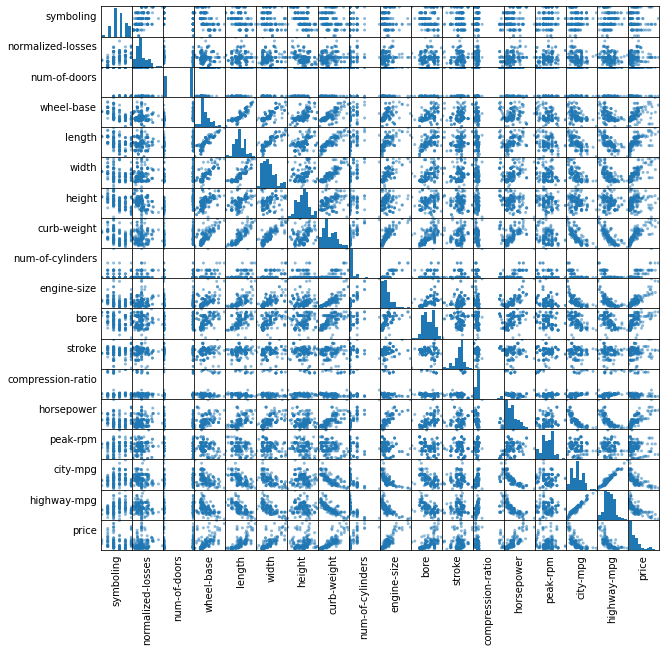

In [13]:
from pandas.plotting import scatter_matrix
import matplotlib
grph = scatter_matrix(numericData, figsize=(10, 10))
noOfColumns = len(numericData.columns)
for i in range(noOfColumns):
    vertico = grph[i, 0]
    vertico.yaxis.label.set_rotation(0)
    vertico.yaxis.label.set_ha('right')
    vertico.set_yticks(())
    horizon = grph[noOfColumns-1, i]
    horizon.xaxis.label.set_rotation(90)
    horizon.set_xticks(())

In [20]:
if ('price' in numeric_features):
    numeric_features.remove('price')

from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = numeric_features, outputCol = 'features')
vDataFields = assembler.transform(dataFields)
vDataFields = vDataFields.select(['features', 'price'])
vDataFields.show(3)

+--------------------+-----+
|            features|price|
+--------------------+-----+
|[3.0,122.0,2.0,88...|13495|
|[3.0,122.0,2.0,88...|16500|
|[1.0,122.0,2.0,94...|16500|
+--------------------+-----+
only showing top 3 rows



In [23]:
train, test = vDataFields.randomSplit([0.8, 0.2], seed = 2020)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))


Training Dataset Count: 143
Test Dataset Count: 49


In [16]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol = 'price', maxIter=10)
lrModel = lr.fit(train)

In [17]:
results=lrModel.evaluate(train) 
  
print('Rsquared Error :', results.r2) 

Rsquared Error : 0.8745744740277719


In [29]:
unlabeledData=test.select('features') 
predictions=lrModel.transform(test) 
predictions.select("prediction", "price").show()

predictions.select("prediction", "price").coalesce(1).write.csv("myresults.csv")

+------------------+-----+
|        prediction|price|
+------------------+-----+
| 16373.62280807476|15985|
| 9309.621778286535| 9988|
|11814.402317457883|10698|
|11688.010433060648| 8921|
|16231.282563325782|16515|
|19519.409981871016|22470|
| 31348.71765950633|34184|
|11166.355624216427| 9279|
|  5308.79599750269| 6575|
|6114.4537093758045| 7898|
| 9989.037142010522|12945|
|   8389.7356578299| 7463|
| 6259.666698957073| 8358|
| 9866.852828341362| 7788|
| 11150.88504285019| 8949|
|10831.651753398539|10245|
| 47020.21811677068|36000|
|14571.094004244667|18344|
|31950.837489260455|35550|
|  18408.0658606765|13860|
+------------------+-----+
only showing top 20 rows

